In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.distributions import gamma

sns.set()
%matplotlib inline

In [3]:
# read in the CSV's
calls = pd.read_csv(r'../data/callsForServiceUpdated.csv')

C:\Users\81wingo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Clean up


In [4]:
calls = calls[calls.rptonly != True]
calls = calls[calls.cancelled != True]
print(len(calls))

1085198


In [5]:
calls['calltime'] = pd.to_datetime(calls.calltime)
calls['year'] = calls.calltime.apply(lambda x: x.date().year)
calls['month'] = calls.calltime.apply(lambda x: x.date().month)
calls['dayOfMonth'] = calls.calltime.apply(lambda x: x.date().day)
calls['hour'] = calls.calltime.apply(lambda x: x.time().hour)
calls = calls.rename(columns={'calldow' : 'dayOfWeek'})
calls = calls.drop(columns = ['timeclose', 'calltime'], axis = 1)
calls

,inci_id,parent_id,case_id,callsource,street,city,streetonly,geox,geoy,nature,...,secsar2lc,secsrt2dsp,secstr2lc,firstdisp,long,lat,year,month,dayOfMonth,hour
0,2012324665,NaN,NaN,SELF,OLD RANDLEMAN RD/COLTRANE MILL RD,G,OLD RANDLEMAN RD/COLTRANE MILL RD,1755293.88,800660.13,TRAFFIC STOP,...,651,0,0,S335,-79.826738,35.947098,2012,7,1,0
1,2012324676,NaN,1234238.0,E911,312 MARTIN LUTHER KING JR DR,G,MARTIN LUTHER KING JR DR,1767127.13,843918.75,HEMORRHAGE / LACERATIONS,...,2454,43,965,M261,-79.787921,36.066193,2012,7,1,0
2,2012324686,NaN,NaN,SELF,4525 W WENDOVER AV,G,W WENDOVER AV,1731815.63,838827.63,TRANSPORT TO ANIMAL SHELTER,...,0,0,0,ACO8,-79.907233,36.051380,2012,7,1,0
3,2012324690,NaN,1234239.0,E911,3905 BROOKHOLLOW RD,W,BROOKHOLLOW RD,1808054.75,822506.31,SEIZURES-CONVULSIONS,...,4522,30,3918,M2,-79.648974,36.008188,2012,7,1,0
4,2012324692,2.012325e+09,1206134.0,E911,3905 BROOKHOLLOW RD,W,BROOKHOLLOW RD,1808054.75,822506.31,SEIZURES-CONVULSIONS,...,900,8,0,E44,-79.648974,36.008188,2012,7,1,0
5,2012324697,NaN,1234240.0,E911,5125 MICHAUX RD,G,MICHAUX RD,1744080.88,874458.88,FALLS-BACK INJURIES(TRAUMATIC),...,0,10,0,M241,-79.866796,36.149555,2012,7,1,0
6,2012324704,NaN,1234241.0,E911,1409 DANS RD,G,DANS RD,1778039.38,840417.56,SICK PERSON,...,2295,29,1267,M211,-79.750911,36.056808,2012,7,1,0
7,2012324709,NaN,NaN,SELF,8069 HAW RIVER RD,ST,HAW RIVER RD,1709461.00,897647.69,TRAFFIC STOP,...,112,0,0,S314,-79.984825,36.212362,2012,7,1,0
8,2012324711,NaN,1234242.0,W911,WESTCHESTER DR/N MAIN ST,H,WESTCHESTER DR/N MAIN ST,1697332.38,814158.75,CHEST PAIN,...,2090,17,1323,M221,-80.023017,35.982696,2012,7,1,0
9,2012324715,NaN,NaN,PHONE,8403 MEARS FORK RD,SU,MEARS FORK RD,1759324.13,906703.25,DOMESTIC DISPUTE,...,1109,102,0,S314,-79.816067,36.238478,2012,7,1,0


In [6]:
calls['actualnature'] = [x['nature2'] if x['nature'] is np.nan and x['nature'] != x['nature2'] else x['nature'] for i,x in calls.iterrows()]

In [7]:
calls.columns


Index(['inci_id', 'parent_id', 'case_id', 'callsource', 'street', 'city',
       'streetonly', 'geox', 'geoy', 'nature', 'nature2', 'priority',
       'medprior', 'meddislvl', 'rptonly', 'service', 'agency', 'district',
       'statbeat', 'ra', 'gp', 'primeunit', 'cancelled', 'closecode',
       'dayOfWeek', 'secs2rt', 'secs2di', 'secs2en', 'secs2ar', 'secs2tr',
       'secs2lc', 'secsdi2en', 'secsdi2ar', 'secsar2tr', 'secsar2lc',
       'secsrt2dsp', 'secstr2lc', 'firstdisp', 'long', 'lat', 'year', 'month',
       'dayOfMonth', 'hour', 'actualnature'],
      dtype='object')

In [8]:
calls.shape

(1085198, 45)

In [9]:
newdf = calls.drop(columns=['inci_id', 'parent_id', 'case_id', 'callsource', 'street', 'city',
       'streetonly', 'geox', 'geoy', 'nature', 'nature2', 'medprior', 'meddislvl', 'rptonly', 'service', 
       'statbeat', 'ra', 'gp', 'primeunit', 'cancelled', 'closecode',
       'dayOfWeek', 'secs2rt', 'secs2di', 'secs2en', 'secs2tr',
       'secs2lc', 'secsdi2en', 'secsdi2ar', 'secsar2tr', 'secsar2lc',
       'secsrt2dsp', 'secstr2lc', 'firstdisp', 'long', 'lat', 'year', 'month',
       'dayOfMonth', 'hour'])

In [10]:
#use sklearn label encoder to convert strings to numbers that can be used for calculations
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in newdf.columns:
    newdf[col] = labelencoder.fit_transform(newdf[col].astype(str))
 
newdf.head(11)

,priority,agency,district,secs2ar,actualnature
0,0,3,58,0,194
1,3,1,13,9397,128
2,8,0,63,0,200
3,0,1,11,14048,175
4,9,2,0,11300,175
5,2,1,9,0,104
6,3,1,4,5985,176
7,0,3,55,1,194
8,0,1,5,6447,70
9,0,3,55,1048,87


In [11]:
newdf.columns


Index(['priority', 'agency', 'district', 'secs2ar', 'actualnature'], dtype='object')

In [12]:
newdf.describe()

,priority,agency,district,secs2ar,actualnature
count,1.085198e+06,1.085198e+06,1.085198e+06,1.085198e+06,1.085198e+06
mean,2.710528e+00,1.797215e+00,3.197854e+01,5.612929e+03,1.251271e+02
std,2.955916e+00,1.072657e+00,2.335354e+01,4.546549e+03,7.061317e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.000000e+00,7.000000e+00,1.000000e+00,6.100000e+01
50%,1.000000e+00,1.000000e+00,3.400000e+01,6.061000e+03,1.260000e+02
75%,4.000000e+00,3.000000e+00,5.700000e+01,8.979000e+03,1.940000e+02
max,1.000000e+01,3.000000e+00,6.300000e+01,1.482200e+04,2.590000e+02


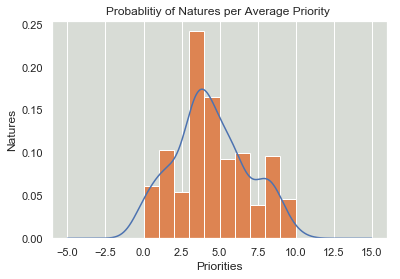

In [13]:
fig, ax = plt.subplots()
x = newdf.groupby(['actualnature'])['priority'].agg(lambda x: x.unique().mean())
x.plot.kde(ax=ax, legend=False, title = 'Probablitiy of Natures per Average Priority ')
x.plot.hist(density = True, ax = ax)
ax.set_ylabel('Natures')
ax.set_xlabel('Priorities')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')


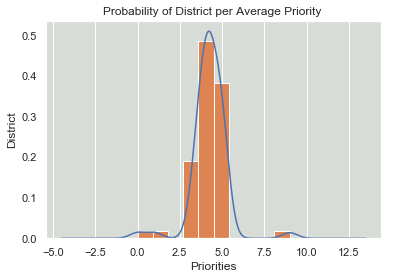

In [14]:
fig, ax = plt.subplots()
x = newdf.groupby(['district'])['priority'].agg(lambda x: x.unique().mean())
x.plot.kde(ax=ax, legend=False, title = 'Probability of District per Average Priority ')
x.plot.hist(density = True, ax = ax)
ax.set_ylabel('District')
ax.set_xlabel('Priorities')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

In [15]:
newdf['priority'].value_counts()

0     302044
1     253865
3     130006
2     103999
6     100373
8      78146
9      78126
4      37366
7        995
10       244
5         34
Name: priority, dtype: int64

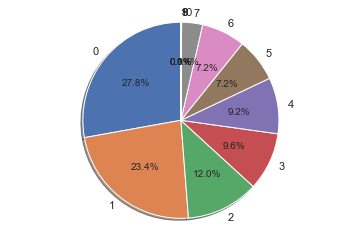

In [17]:
labels = '0','1', '2', '3','4', '5', '6','7', '8', '9','10'
sizes = newdf['priority'].value_counts()
 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

## Check the R Squared value to see if any of the variables can be used to conclude anything useful

In [ ]:
fig, axs = plt.subplots(1, 3, sharey=True)
newdf.plot(kind='scatter', x='actualnature', y='priority', ax=axs[0], figsize=(16, 8))
newdf.plot(kind='scatter', x='district', y='priority', ax=axs[1])
newdf.plot(kind='scatter', x='agency', y='priority', ax=axs[2])

In [ ]:
fig, axs = plt.subplots(1, 3, sharey=True)
newdf.plot(kind='scatter', x='priority', y='actualnature', ax=axs[0], figsize=(16, 8))
newdf.plot(kind='scatter', x='priority', y='district', ax=axs[1])
newdf.plot(kind='scatter', x='priority', y='agency', ax=axs[2])



In [ ]:

newdf.plot(kind='scatter', x= 'district', y ='agency')
newdf.plot(kind='scatter', x='priority', y='secs2ar', ax=axs[2])

In [ ]:
import statsmodels.formula.api as smf
fitdf= smf.ols(formula = 'priority ~ district + agency + actualnature + secs2ar', data= newdf).fit()
fitdf.params

In [ ]:
fitdf.rsquared

In [ ]:
fitdf.summary()

In [ ]:
newdf.corr()

## The set is too big to use it on my personal computer I let this run for about 3 hours and it didnt finsh so i am going to do a random sampling of the data and see if i can get it execute faster
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X = newdf.iloc[:,1:4]
y = newdf.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)

clf = svm.SVC()
clf.fit(X_train, y_train)

X_test=scaler.fit_transform(X_test)
y_predict=clf.predict(X_test)

from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
print(score)

In [ ]:
newdf.sample(n=1000, replace = False)

In [ ]:
newdf.head()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X = newdf.iloc[:,1:4]
y = newdf.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In [ ]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

In [ ]:
regression_model.score(X_test, y_test)

In [ ]:
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = newdf.iloc[:,1:4]
y = newdf.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)

clf = svm.SVC()
clf.fit(X_train, y_train)

X_test=scaler.fit_transform(X_test)
y_predict=clf.predict(X_test)

from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
print(score)